# Movie Success Analysis
## Exploratory Data Analysis for Movie Success Prediction
This notebook performs a comprehensive exploratory data analysis on the TMDB Movies Dataset 2023. The analysis focuses on understanding key financial and production attributes to inform the development of a predictive model for a film's success.

* Dataset: TMDB Movies Dataset 2023
* Size: Over 100MB with over 930,000 records
* Source: Kaggle

### 1. Import Required Libraries 

In [95]:
# Essential Libraries for Film Industry Big Data Analysis

import dask.dataframe as dd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [96]:

# Load dataset using Dask
df = dd.read_csv('TMDB_movie_dataset_v11.csv')
print(f"Dataset shape: {df.shape}")
print(f"Dataset columns: {df.columns.tolist()}")
df.head()

Dataset shape: (<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(d21cbe3)).size() // 24, dtype=int64>, 24)
Dataset columns: ['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date', 'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'tagline', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'keywords']


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,https://www.avatar.com/movies/avatar,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


### 3: Display Basic Dataset Information

In [97]:
# Display Basic Dataset Information

print("=" * 60)
print("DATASET INFORMATION")
print("=" * 60)

print(f"Dataset shape: {df.shape[0].compute()} rows x {df.shape[1]} columns")
print(f"Dataset size in memory: {df.memory_usage(deep=True).sum().compute() / 1024**2:.2f} MB")

print("\nColumn Names and Data Types:")
for col, dtype in zip(df.columns, df.dtypes):
    print(f"  {col}: {dtype}")

print("\nMissing Values Analysis:")
missing_values = df.isnull().sum().compute()
missing_percent = (missing_values / len(df) * 100)
for col in df.columns:
    if missing_values[col] > 0:
        print(f"  {col}: {missing_values[col]} ({missing_percent[col]:.2f}%)")

print("\nNumerical Columns Summary:")
print(df.describe().compute())

print("\nCategorical Columns Unique Values:")
for col in df.columns:
    if df[col].dtype == 'object':
        unique_count = df[col].nunique().compute()
        print(f"  {col}: {unique_count} unique values")

print("\nFirst 5 rows:")
print(df.head())

print("\nLast 5 rows:")
print(df.tail())

DATASET INFORMATION
Dataset shape: 1275529 rows x 24 columns
Dataset size in memory: 658.04 MB

Column Names and Data Types:
  id: int64
  title: string
  vote_average: float64
  vote_count: int64
  status: string
  release_date: string
  revenue: int64
  runtime: int64
  adult: bool
  backdrop_path: string
  budget: int64
  homepage: string
  imdb_id: string
  original_language: string
  original_title: string
  overview: string
  popularity: float64
  poster_path: string
  tagline: string
  genres: string
  production_companies: string
  production_countries: string
  spoken_languages: string
  keywords: string

Missing Values Analysis:
  title: 14 (0.00%)
  release_date: 248047 (19.45%)
  backdrop_path: 947445 (74.28%)
  homepage: 1142567 (89.58%)
  imdb_id: 639949 (50.17%)
  original_title: 14 (0.00%)
  overview: 278718 (21.85%)
  poster_path: 428733 (33.61%)
  tagline: 1097151 (86.02%)
  genres: 538474 (42.22%)
  production_companies: 716373 (56.16%)
  production_countries: 594254

### 5: Enhanced Data Quality Assessment for Film Industry Analysis

In [99]:
# Enhanced Data Quality Assessment for Film Industry Analysis

print("=" * 70)
print("ENHANCED DATA QUALITY ASSESSMENT")
print("=" * 70)

# 1. Data Completeness Analysis
print("\n1. DATA COMPLETENESS ANALYSIS")
print("-" * 40)
completeness = (1 - df.isnull().sum() / len(df)) * 100
completeness_computed = completeness.compute()
print("Column Completeness (%):")
for col in df.columns:
    status = "✓ Good" if completeness_computed[col] >= 95 else "⚠ Poor" if completeness_computed[col] < 50 else "△ Fair"
    print(f"  {col}: {completeness_computed[col]:.1f}% {status}")



ENHANCED DATA QUALITY ASSESSMENT

1. DATA COMPLETENESS ANALYSIS
----------------------------------------
Column Completeness (%):
  id: 100.0% ✓ Good
  title: 100.0% ✓ Good
  vote_average: 100.0% ✓ Good
  vote_count: 100.0% ✓ Good
  status: 100.0% ✓ Good
  release_date: 80.6% △ Fair
  revenue: 100.0% ✓ Good
  runtime: 100.0% ✓ Good
  adult: 100.0% ✓ Good
  backdrop_path: 25.7% ⚠ Poor
  budget: 100.0% ✓ Good
  homepage: 10.4% ⚠ Poor
  imdb_id: 49.8% ⚠ Poor
  original_language: 100.0% ✓ Good
  original_title: 100.0% ✓ Good
  overview: 78.1% △ Fair
  popularity: 100.0% ✓ Good
  poster_path: 66.4% △ Fair
  tagline: 14.0% ⚠ Poor
  genres: 57.8% △ Fair
  production_companies: 43.8% ⚠ Poor
  production_countries: 53.4% △ Fair
  spoken_languages: 55.3% △ Fair
  keywords: 25.8% ⚠ Poor


In [100]:
# 2. Data Type Validation
print("\n2. DATA TYPE VALIDATION")
print("-" * 40)
print("Expected vs Actual Data Types:")
for col in df.columns:
    print(f"  {col}: {df[col].dtype}")




2. DATA TYPE VALIDATION
----------------------------------------
Expected vs Actual Data Types:
  id: int64
  title: string
  vote_average: float64
  vote_count: int64
  status: string
  release_date: string
  revenue: int64
  runtime: int64
  adult: bool
  backdrop_path: string
  budget: int64
  homepage: string
  imdb_id: string
  original_language: string
  original_title: string
  overview: string
  popularity: float64
  poster_path: string
  tagline: string
  genres: string
  production_companies: string
  production_countries: string
  spoken_languages: string
  keywords: string


In [101]:
# 3. Duplicate Records Analysis
print("\n3. DUPLICATE RECORDS ANALYSIS")
print("-" * 40)
total_rows = len(df)
duplicate_rows = df.map_partitions(lambda x: x.duplicated()).sum().compute()
print(f"Total records: {total_rows}")
print(f"Duplicate records: {duplicate_rows}")
print(f"Duplicate percentage: {(duplicate_rows/total_rows*100):.2f}%")




3. DUPLICATE RECORDS ANALYSIS
----------------------------------------
Total records: 1275529
Duplicate records: 317
Duplicate percentage: 0.02%


In [102]:
# 4. Outlier Detection for Numerical Columns
print("\n4. OUTLIER DETECTION")
print("-" * 40)
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25).compute()
    Q3 = df[col].quantile(0.75).compute()
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count().compute()
    print(f"  {col}: {outliers} outliers ({(outliers/total_rows*100):.2f}%)")




4. OUTLIER DETECTION
----------------------------------------
  id: 0 outliers (0.00%)
  vote_average: 928334 outliers (72.78%)
  vote_count: 354682 outliers (27.81%)
  revenue: 22523 outliers (1.77%)
  runtime: 788717 outliers (61.83%)
  budget: 69862 outliers (5.48%)
  popularity: 1079570 outliers (84.64%)


In [103]:
# 5. Data Range Validation
print("\n5. DATA RANGE VALIDATION")
print("-" * 40)
for col in numerical_cols:
    min_val = df[col].min().compute()
    max_val = df[col].max().compute()
    print(f"  {col}: Range [{min_val:.2f} to {max_val:.2f}]")




5. DATA RANGE VALIDATION
----------------------------------------
  id: Range [2.00 to 1533908.00]
  vote_average: Range [0.00 to 10.00]
  vote_count: Range [0.00 to 34495.00]
  revenue: Range [-12.00 to 4999999999.00]
  runtime: Range [-28.00 to 14400.00]
  budget: Range [0.00 to 999999999.00]
  popularity: Range [0.00 to 2994.36]


In [106]:
# 6. Categorical Data Analysis
print("\n6. CATEGORICAL DATA ANALYSIS")
print("-" * 40)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    unique_count = df[col].nunique().compute()
    top_value = df[col].value_counts().head(1).compute()
    print(f"  {col}: {unique_count} unique values")
    if len(top_value) > 0:
        print(f"    Most frequent: {top_value.index[0]} ({top_value.iloc[0]} times)")




6. CATEGORICAL DATA ANALYSIS
----------------------------------------


In [105]:
# 7. Data Quality Score
print("\n7. OVERALL DATA QUALITY SCORE")
print("-" * 40)
avg_completeness = completeness_computed.mean()
duplicate_penalty = (duplicate_rows/total_rows*100)
quality_score = avg_completeness - duplicate_penalty
print(f"Average Completeness: {avg_completeness:.1f}%")
print(f"Duplicate Penalty: {duplicate_penalty:.1f}%")
print(f"Overall Quality Score: {quality_score:.1f}%")

if quality_score >= 90:
    print("📊 Data Quality: EXCELLENT")
elif quality_score >= 75:
    print("📊 Data Quality: GOOD")
elif quality_score >= 60:
    print("📊 Data Quality: FAIR")
else:
    print("📊 Data Quality: POOR - Requires significant cleaning")


7. OVERALL DATA QUALITY SCORE
----------------------------------------
Average Completeness: 73.4%
Duplicate Penalty: 0.0%
Overall Quality Score: 73.4%
📊 Data Quality: FAIR


### 6: Data Preprocessing and Feature Engineering

In [ ]:
print("=" * 60)
print("DATA PREPROCESSING")
print("=" * 60)

# 1. Drop unnecessary columns with high missing values and irrelevant features
print("\n1. DROPPING UNNECESSARY COLUMNS")
print("-" * 40)

columns_to_drop = [
    'backdrop_path',     # 74.3% missing, just file paths
    'homepage',          # 89.6% missing, not predictive
    'imdb_id',          # 50.2% missing, identifier only
    'poster_path',       # 33.6% missing, just file paths
    'tagline',          # Missing values, text data less predictive
    'keywords',         # 74.2% missing
    'production_companies',  # 56.2% missing
    'id',               # Just identifier, not predictive
    'original_title',   # Duplicate of title information
    'adult'             # Boolean with likely low variance
]

print(f"Columns to drop: {columns_to_drop}")
print(f"Original shape: {df.shape[0].compute()} rows x {df.shape[1]} columns")

# Drop columns
df_cleaned = df.drop(columns=columns_to_drop)
print(f"After dropping: {df_cleaned.shape[0].compute()} rows x {df_cleaned.shape[1]} columns")
df_cleaned.head


DATA PREPROCESSING

1. DROPPING UNNECESSARY COLUMNS
----------------------------------------
Columns to drop: ['backdrop_path', 'homepage', 'imdb_id', 'poster_path', 'tagline', 'keywords', 'production_companies', 'id', 'original_title', 'adult']
Original shape: 1275529 rows x 24 columns
After dropping: 1275529 rows x 14 columns


<bound method FrameBase.head of Dask DataFrame Structure:
                  id   title vote_average vote_count  status release_date revenue runtime adult backdrop_path budget homepage imdb_id original_language original_title overview popularity poster_path tagline  genres production_companies production_countries spoken_languages keywords
npartitions=8                                                                                                                                                                                                                                                                             
               int64  string      float64      int64  string       string   int64   int64  bool        string  int64   string  string            string         string   string    float64      string  string  string               string               string           string   string
                 ...     ...          ...        ...     ...          ...     ...     ...   .

In [ ]:
df_cleaned.head (5)

,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,original_language,overview,popularity,genres,production_countries,spoken_languages
0,Inception,8.364,34495,Released,2010-07-15,825532764,148,160000000,en,"Cobb, a skilled thief who commits corporate es...",83.952,"Action, Science Fiction, Adventure","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,165000000,en,The adventures of a group of explorers who mak...,140.241,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",English
2,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,185000000,en,Batman raises the stakes in his war on crime. ...,130.643,"Drama, Action, Crime, Thriller","United Kingdom, United States of America","English, Mandarin"
3,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,237000000,en,"In the 22nd century, a paraplegic Marine is di...",79.932,"Action, Adventure, Fantasy, Science Fiction","United States of America, United Kingdom","English, Spanish"
4,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,220000000,en,When an unexpected enemy emerges and threatens...,98.082,"Science Fiction, Action, Adventure",United States of America,"English, Hindi, Russian"


In [118]:
# 2. Handle missing values for remaining columns
print("\n2. HANDLING MISSING VALUES")
print("-" * 40)

# Check remaining missing values
remaining_missing = df_cleaned.isnull().sum().compute()
print("Missing values in remaining columns:")
for col in df_cleaned.columns:
    if remaining_missing[col] > 0:
        print(f"  {col}: {remaining_missing[col]} ({remaining_missing[col]/len(df_cleaned)*100:.1f}%)")

# Fill missing values based on column type and context
print("\nFilling missing values...")

# Release date - drop rows with missing release dates (critical for film analysis)
df_cleaned = df_cleaned.dropna(subset=['release_date'])

# Overview - fill with "No overview available"
df_cleaned['overview'] = df_cleaned['overview'].fillna("No overview available")

# Production countries and spoken languages - fill with "Unknown"
df_cleaned['production_countries'] = df_cleaned['production_countries'].fillna("Unknown")
df_cleaned['spoken_languages'] = df_cleaned['spoken_languages'].fillna("Unknown")


2. HANDLING MISSING VALUES
----------------------------------------
Missing values in remaining columns:
  title: 14 (0.0%)
  release_date: 248047 (19.4%)
  overview: 278718 (21.9%)
  genres: 538474 (42.2%)
  production_countries: 594254 (46.6%)
  spoken_languages: 570668 (44.7%)

Filling missing values...


In [119]:
# 3. Handle outliers for key numerical columns
print("\n3. HANDLING OUTLIERS")
print("-" * 40)

# Remove negative values that don't make sense
df_cleaned = df_cleaned[df_cleaned['revenue'] >= 0]
df_cleaned = df_cleaned[df_cleaned['runtime'] > 0]
df_cleaned = df_cleaned[df_cleaned['budget'] >= 0]

# Cap extreme outliers for revenue and budget (keep top 99.5%)
revenue_cap = df_cleaned['revenue'].quantile(0.995).compute()
budget_cap = df_cleaned['budget'].quantile(0.995).compute()
runtime_cap = df_cleaned['runtime'].quantile(0.995).compute()

df_cleaned = df_cleaned[df_cleaned['revenue'] <= revenue_cap]
df_cleaned = df_cleaned[df_cleaned['budget'] <= budget_cap]
df_cleaned = df_cleaned[df_cleaned['runtime'] <= runtime_cap]

print(f"Revenue cap: ${revenue_cap:,.0f}")
print(f"Budget cap: ${budget_cap:,.0f}")
print(f"Runtime cap: {runtime_cap:.0f} minutes")



3. HANDLING OUTLIERS
----------------------------------------
Revenue cap: $161,430,514
Budget cap: $94,175,000
Runtime cap: 310 minutes


In [120]:
# 4. Remove duplicates
print("\n4. REMOVING DUPLICATES")
print("-" * 40)
initial_rows = len(df_cleaned)
df_cleaned = df_cleaned.drop_duplicates()
final_rows = len(df_cleaned)
print(f"Removed {initial_rows - final_rows} duplicate rows")

# 5. Final dataset summary
print("\n5. FINAL DATASET SUMMARY")
print("-" * 40)
print(f"Final shape: {df_cleaned.shape[0].compute()} rows x {df_cleaned.shape[1]} columns")
print(f"Remaining columns: {list(df_cleaned.columns)}")
print(f"Missing values: {df_cleaned.isnull().sum().sum().compute()}")

print("\nPreprocessing completed successfully!")
print("Dataset is ready for feature engineering and modeling.")


4. REMOVING DUPLICATES
----------------------------------------
Removed 159 duplicate rows

5. FINAL DATASET SUMMARY
----------------------------------------
Final shape: 790506 rows x 14 columns
Remaining columns: ['title', 'vote_average', 'vote_count', 'status', 'release_date', 'revenue', 'runtime', 'budget', 'original_language', 'overview', 'popularity', 'genres', 'production_countries', 'spoken_languages']
Missing values: 241785

Preprocessing completed successfully!
Dataset is ready for feature engineering and modeling.


### 7: Exploratory Data Analysis (EDA)


EXPLORATORY DATA ANALYSIS (EDA)
Using sample of 39526 rows for visualization


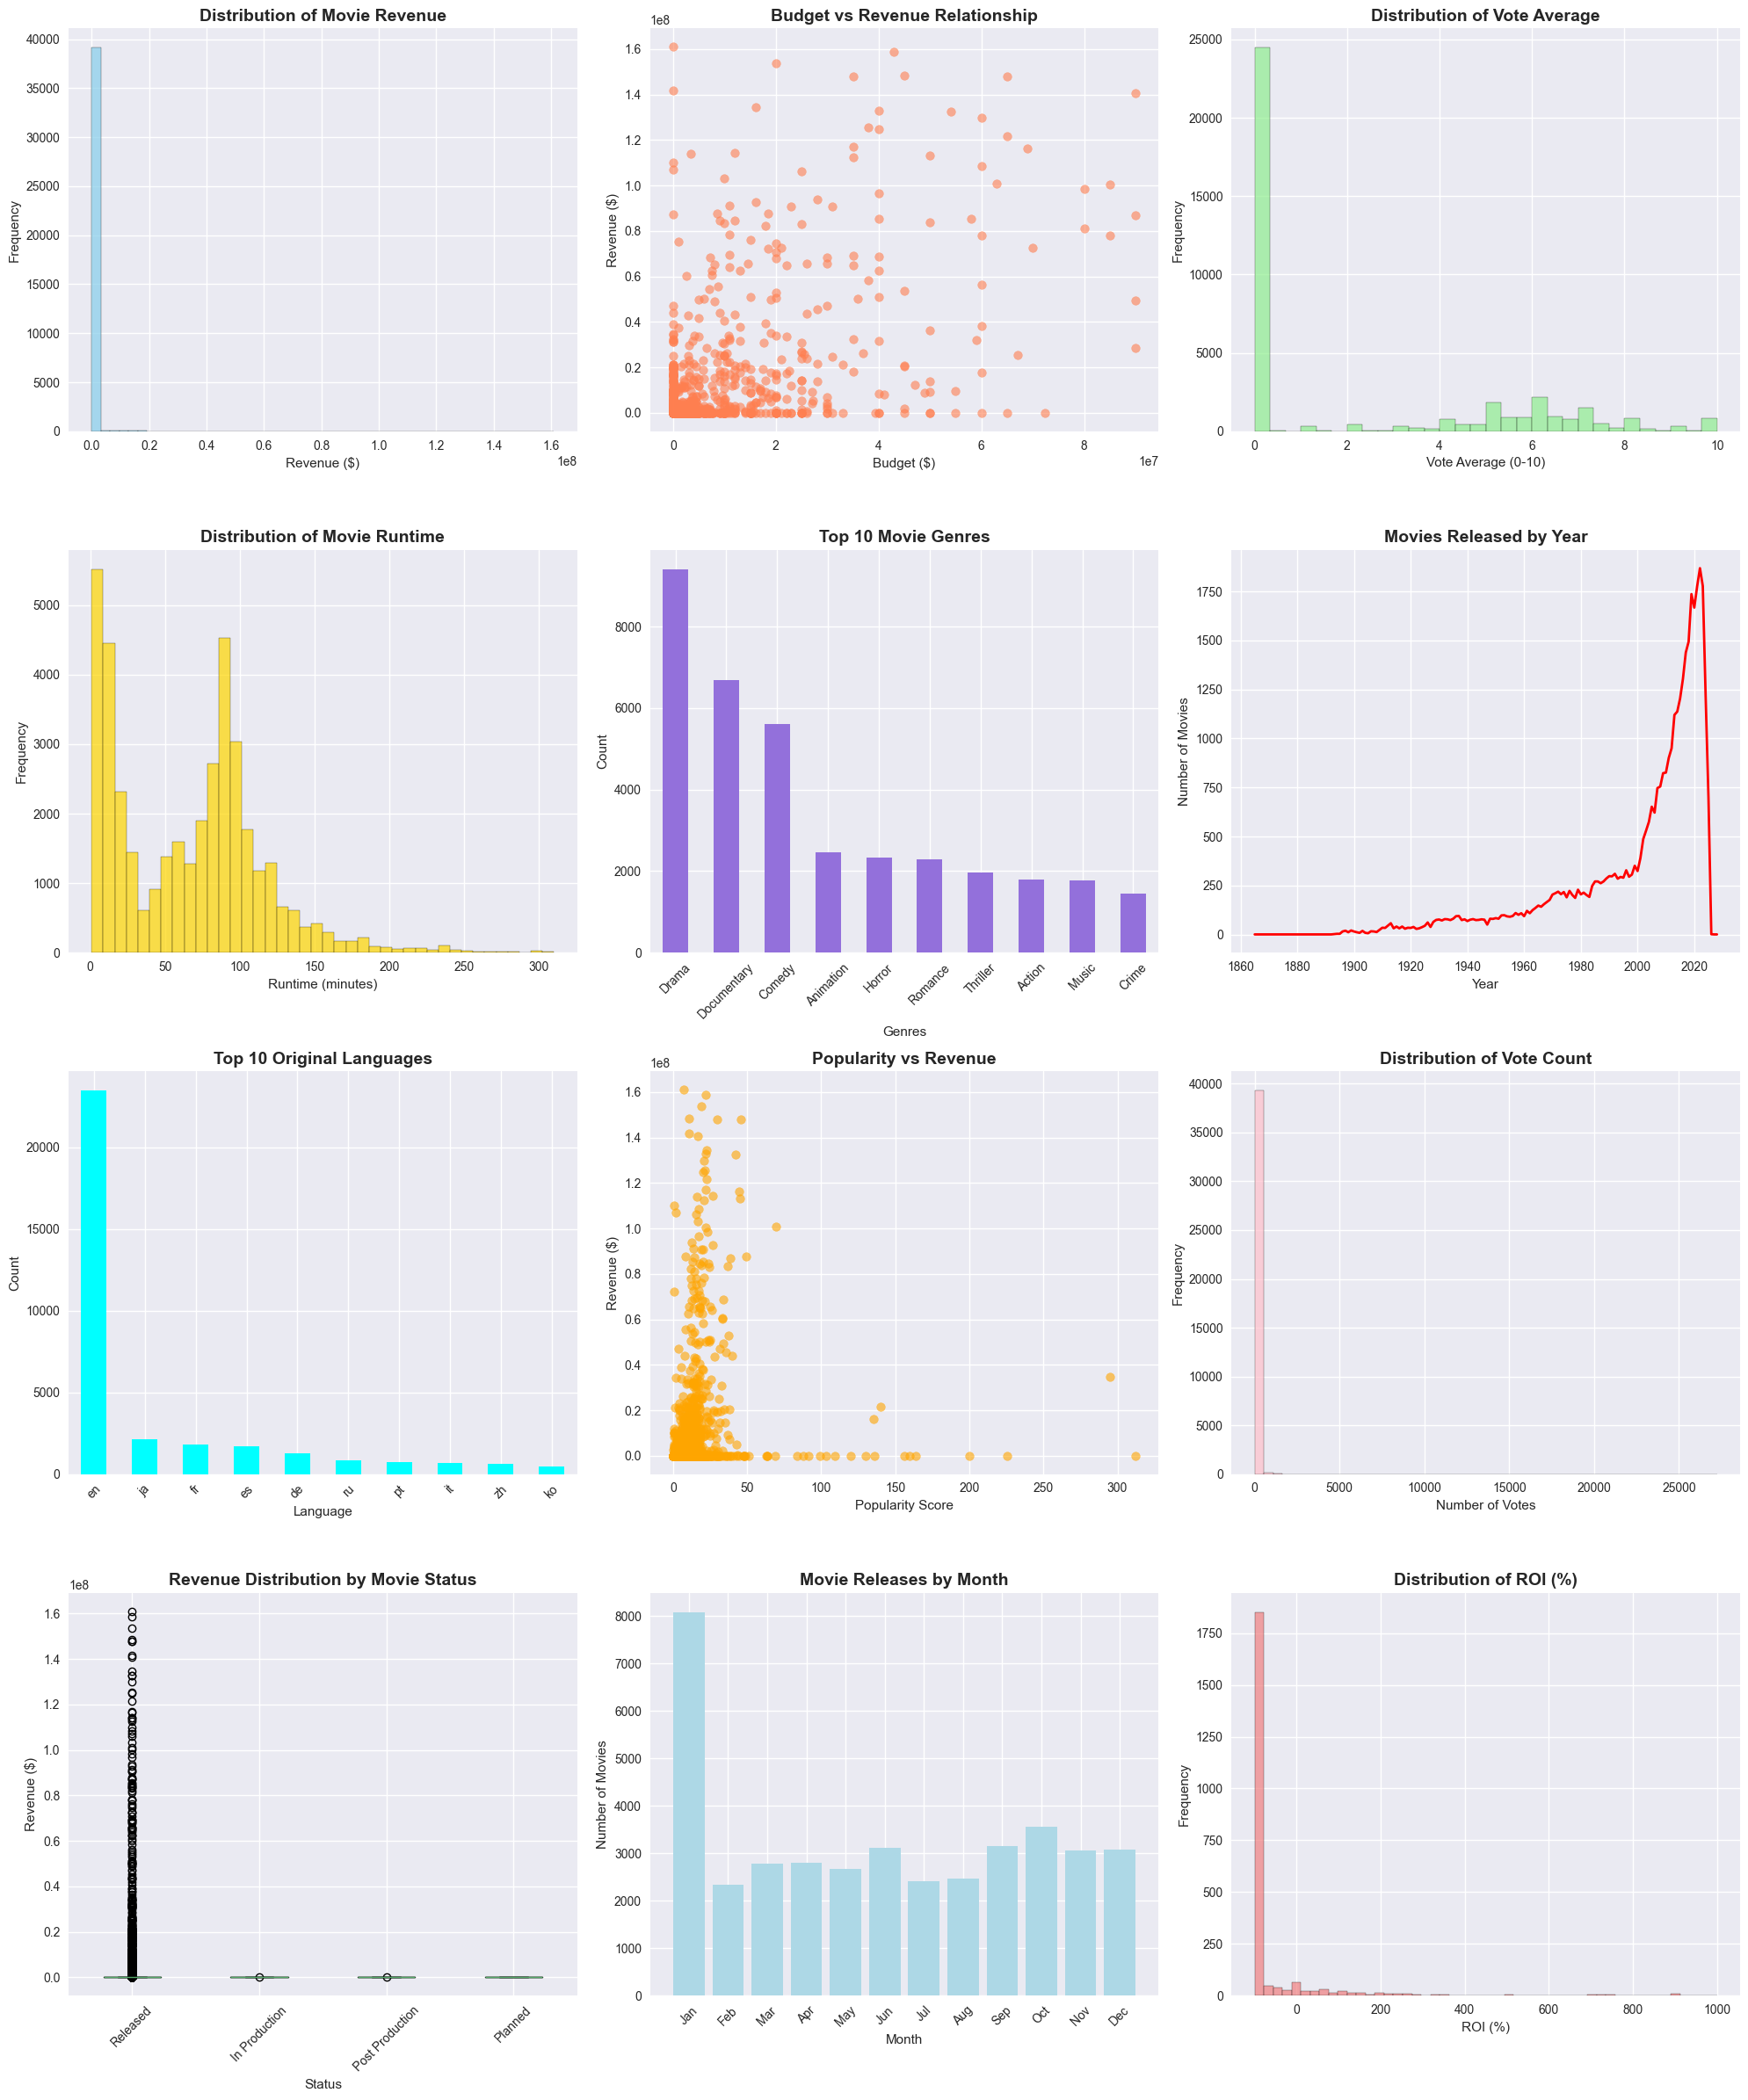

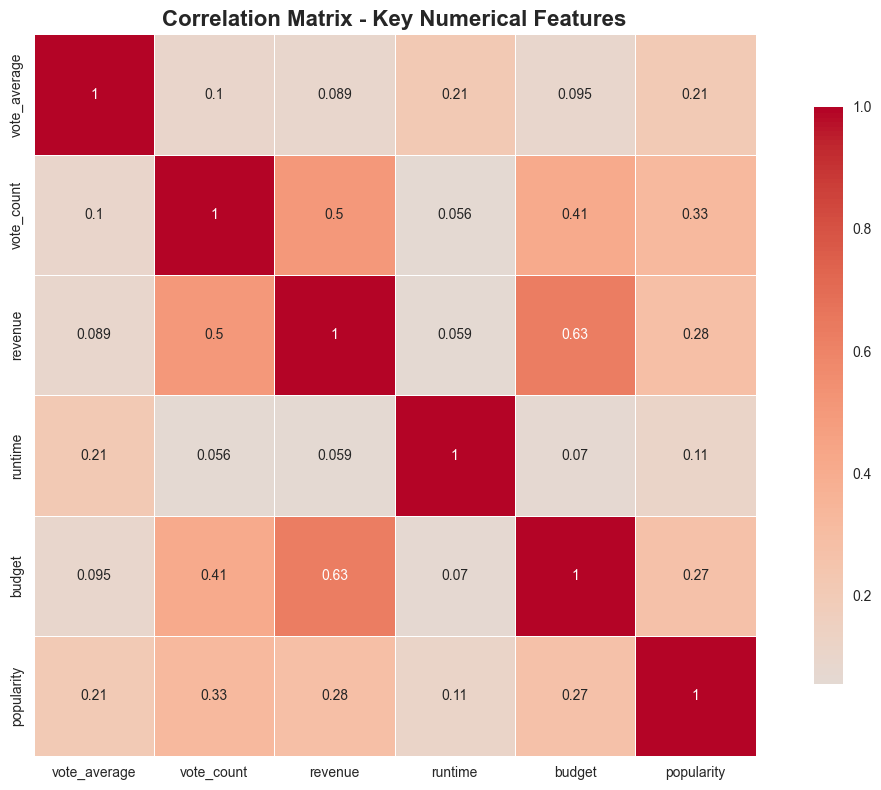


KEY INSIGHTS FROM EDA
Total movies analyzed: 39,526
Average revenue: $326,034
Average budget: $216,541
Average rating: 2.29/10
Average runtime: 66 minutes
Most common genre: Drama
Most common language: en
Peak release year: 2022
Most popular release month: Jan

Key Correlations with Revenue:
  budget: 0.631
  vote_count: 0.503
  popularity: 0.283
  vote_average: 0.089
  runtime: 0.059

EDA completed successfully!


In [122]:
# Exploratory Data Analysis (EDA) - Film Industry Dataset

print("=" * 60)
print("EXPLORATORY DATA ANALYSIS (EDA)")
print("=" * 60)

# Convert to pandas for visualization (sample if too large)
if len(df_cleaned) > 100000:
    df_sample = df_cleaned.sample(frac=0.05, random_state=42).compute()
    print(f"Using sample of {len(df_sample)} rows for visualization")
else:
    df_sample = df_cleaned.compute()

plt.style.use('seaborn-v0_8')
fig = plt.figure(figsize=(20, 24))

# 1. Revenue Distribution
plt.subplot(4, 3, 1)
plt.hist(df_sample['revenue'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Revenue', fontsize=14, fontweight='bold')
plt.xlabel('Revenue ($)')
plt.ylabel('Frequency')
plt.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))

# 2. Budget vs Revenue Scatter Plot
plt.subplot(4, 3, 2)
plt.scatter(df_sample['budget'], df_sample['revenue'], alpha=0.6, color='coral')
plt.title('Budget vs Revenue Relationship', fontsize=14, fontweight='bold')
plt.xlabel('Budget ($)')
plt.ylabel('Revenue ($)')
plt.ticklabel_format(style='scientific', axis='both', scilimits=(0,0))

# 3. Vote Average Distribution
plt.subplot(4, 3, 3)
plt.hist(df_sample['vote_average'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Distribution of Vote Average', fontsize=14, fontweight='bold')
plt.xlabel('Vote Average (0-10)')
plt.ylabel('Frequency')

# 4. Runtime Distribution
plt.subplot(4, 3, 4)
plt.hist(df_sample['runtime'], bins=40, alpha=0.7, color='gold', edgecolor='black')
plt.title('Distribution of Movie Runtime', fontsize=14, fontweight='bold')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')

# 5. Top 10 Genres
plt.subplot(4, 3, 5)
genre_counts = df_sample['genres'].str.split(',').explode().str.strip().value_counts().head(10)
genre_counts.plot(kind='bar', color='mediumpurple')
plt.title('Top 10 Movie Genres', fontsize=14, fontweight='bold')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)

# 6. Release Year Trend
plt.subplot(4, 3, 6)
df_sample['release_year'] = pd.to_datetime(df_sample['release_date']).dt.year
yearly_counts = df_sample['release_year'].value_counts().sort_index()
yearly_counts.plot(kind='line', color='red', linewidth=2)
plt.title('Movies Released by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

# 7. Top Languages
plt.subplot(4, 3, 7)
lang_counts = df_sample['original_language'].value_counts().head(10)
lang_counts.plot(kind='bar', color='cyan')
plt.title('Top 10 Original Languages', fontsize=14, fontweight='bold')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)

# 8. Popularity vs Revenue
plt.subplot(4, 3, 8)
plt.scatter(df_sample['popularity'], df_sample['revenue'], alpha=0.6, color='orange')
plt.title('Popularity vs Revenue', fontsize=14, fontweight='bold')
plt.xlabel('Popularity Score')
plt.ylabel('Revenue ($)')
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

# 9. Vote Count Distribution
plt.subplot(4, 3, 9)
plt.hist(df_sample['vote_count'], bins=50, alpha=0.7, color='pink', edgecolor='black')
plt.title('Distribution of Vote Count', fontsize=14, fontweight='bold')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')

# 10. Box Plot - Revenue by Status
plt.subplot(4, 3, 10)
status_revenue = [df_sample[df_sample['status'] == status]['revenue'] for status in df_sample['status'].unique()]
plt.boxplot(status_revenue, labels=df_sample['status'].unique())
plt.title('Revenue Distribution by Movie Status', fontsize=14, fontweight='bold')
plt.xlabel('Status')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

# 11. Monthly Release Pattern
plt.subplot(4, 3, 11)
df_sample['release_month'] = pd.to_datetime(df_sample['release_date']).dt.month
monthly_counts = df_sample['release_month'].value_counts().sort_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(range(1, 13), [monthly_counts.get(i, 0) for i in range(1, 13)], color='lightblue')
plt.title('Movie Releases by Month', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.xticks(range(1, 13), month_names, rotation=45)

# 12. ROI Analysis (Return on Investment)
plt.subplot(4, 3, 12)
df_sample['roi'] = ((df_sample['revenue'] - df_sample['budget']) / df_sample['budget']) * 100
df_sample['roi'] = df_sample['roi'].replace([np.inf, -np.inf], np.nan)
roi_clean = df_sample['roi'].dropna()
roi_capped = roi_clean[(roi_clean >= -100) & (roi_clean <= 1000)]  # Cap extreme values
plt.hist(roi_capped, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Distribution of ROI (%)', fontsize=14, fontweight='bold')
plt.xlabel('ROI (%)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
numerical_cols = ['vote_average', 'vote_count', 'revenue', 'runtime', 'budget', 'popularity']
correlation_matrix = df_sample[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix - Key Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Summary Statistics
print("\n" + "="*60)
print("KEY INSIGHTS FROM EDA")
print("="*60)

print(f"Total movies analyzed: {len(df_sample):,}")
print(f"Average revenue: ${df_sample['revenue'].mean():,.0f}")
print(f"Average budget: ${df_sample['budget'].mean():,.0f}")
print(f"Average rating: {df_sample['vote_average'].mean():.2f}/10")
print(f"Average runtime: {df_sample['runtime'].mean():.0f} minutes")
print(f"Most common genre: {genre_counts.index[0]}")
print(f"Most common language: {lang_counts.index[0]}")
print(f"Peak release year: {yearly_counts.idxmax()}")
print(f"Most popular release month: {month_names[monthly_counts.idxmax()-1]}")

# High-level correlations
print(f"\nKey Correlations with Revenue:")
revenue_corr = correlation_matrix['revenue'].sort_values(ascending=False)
for feature, corr in revenue_corr.items():
    if feature != 'revenue':
        print(f"  {feature}: {corr:.3f}")

print("\nEDA completed successfully!")

### Random Forest Model Training - Film Industry Prediction

In [123]:
# Random Forest Model Training - Film Industry Prediction

print("=" * 60)
print("RANDOM FOREST MODEL TRAINING")
print("=" * 60)

# 1. Feature Engineering and Target Variable Creation
print("\n1. FEATURE ENGINEERING")
print("-" * 40)

# Convert to pandas for model training
df_model = df_cleaned.compute()

# Create target variable - ROI (Return on Investment)
df_model['roi'] = ((df_model['revenue'] - df_model['budget']) / df_model['budget']) * 100
df_model['roi'] = df_model['roi'].replace([np.inf, -np.inf], np.nan)

# Remove rows with invalid ROI
df_model = df_model.dropna(subset=['roi'])

# Create additional features
df_model['release_year'] = pd.to_datetime(df_model['release_date']).dt.year
df_model['release_month'] = pd.to_datetime(df_model['release_date']).dt.month
df_model['release_quarter'] = pd.to_datetime(df_model['release_date']).dt.quarter

# Budget categories
df_model['budget_category'] = pd.cut(df_model['budget'], 
                                   bins=[0, 1000000, 15000000, 50000000, float('inf')],
                                   labels=['Low', 'Medium', 'High', 'Blockbuster'])

print(f"Dataset shape after feature engineering: {df_model.shape}")
print(f"Target variable (ROI) range: {df_model['roi'].min():.2f}% to {df_model['roi'].max():.2f}%")


RANDOM FOREST MODEL TRAINING

1. FEATURE ENGINEERING
----------------------------------------
Dataset shape after feature engineering: (44549, 19)
Target variable (ROI) range: -100.00% to 9999999900.00%


In [124]:

# 2. Prepare Features for Model
print("\n2. FEATURE PREPARATION")
print("-" * 40)

# Select features for the model
feature_columns = [
    'vote_average', 'vote_count', 'runtime', 'budget', 'popularity',
    'release_year', 'release_month', 'release_quarter'
]

# Handle categorical variables
label_encoders = {}

# Encode categorical variables
categorical_columns = ['status', 'original_language', 'budget_category']
for col in categorical_columns:
    le = LabelEncoder()
    df_model[f'{col}_encoded'] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le
    feature_columns.append(f'{col}_encoded')

# Prepare feature matrix
X = df_model[feature_columns]
y = df_model['roi']

# Cap extreme ROI values for better model performance
y = np.clip(y, -200, 1000)

print(f"Feature matrix shape: {X.shape}")
print(f"Features used: {feature_columns}")
print(f"Target variable statistics:")
print(f"  Mean ROI: {y.mean():.2f}%")
print(f"  Std ROI: {y.std():.2f}%")
print(f"  Min ROI: {y.min():.2f}%")
print(f"  Max ROI: {y.max():.2f}%")




2. FEATURE PREPARATION
----------------------------------------
Feature matrix shape: (44549, 11)
Features used: ['vote_average', 'vote_count', 'runtime', 'budget', 'popularity', 'release_year', 'release_month', 'release_quarter', 'status_encoded', 'original_language_encoded', 'budget_category_encoded']
Target variable statistics:
  Mean ROI: -34.44%
  Std ROI: 194.09%
  Min ROI: -100.00%
  Max ROI: 1000.00%



3. TRAIN-TEST SPLIT
----------------------------------------
Training set: 35639 samples
Test set: 8910 samples

4. FEATURE SCALING
----------------------------------------
Features scaled using StandardScaler

5. RANDOM FOREST TRAINING
----------------------------------------
Training Random Forest model...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


Model training completed!

6. MAKING PREDICTIONS
----------------------------------------
Predictions completed for both training and test sets

7. MODEL EVALUATION
----------------------------------------
TRAINING SET PERFORMANCE:
  MSE: 11899.63
  R² Score: 0.6882
  MAE: 46.99%

TEST SET PERFORMANCE:
  MSE: 26055.59
  R² Score: 0.2696
  MAE: 70.97%

Overfitting Check: 0.4186
⚠️  Model shows signs of overfitting

8. FEATURE IMPORTANCE ANALYSIS
----------------------------------------
Top 10 Most Important Features:
  1. vote_count: 0.3109
  2. budget: 0.1754
  3. runtime: 0.1129
  4. release_year: 0.1115
  5. popularity: 0.0968
  6. vote_average: 0.0837
  7. original_language_encoded: 0.0488
  8. release_month: 0.0445
  9. release_quarter: 0.0109
  10. budget_category_encoded: 0.0040

9. CREATING PERFORMANCE VISUALIZATIONS
----------------------------------------


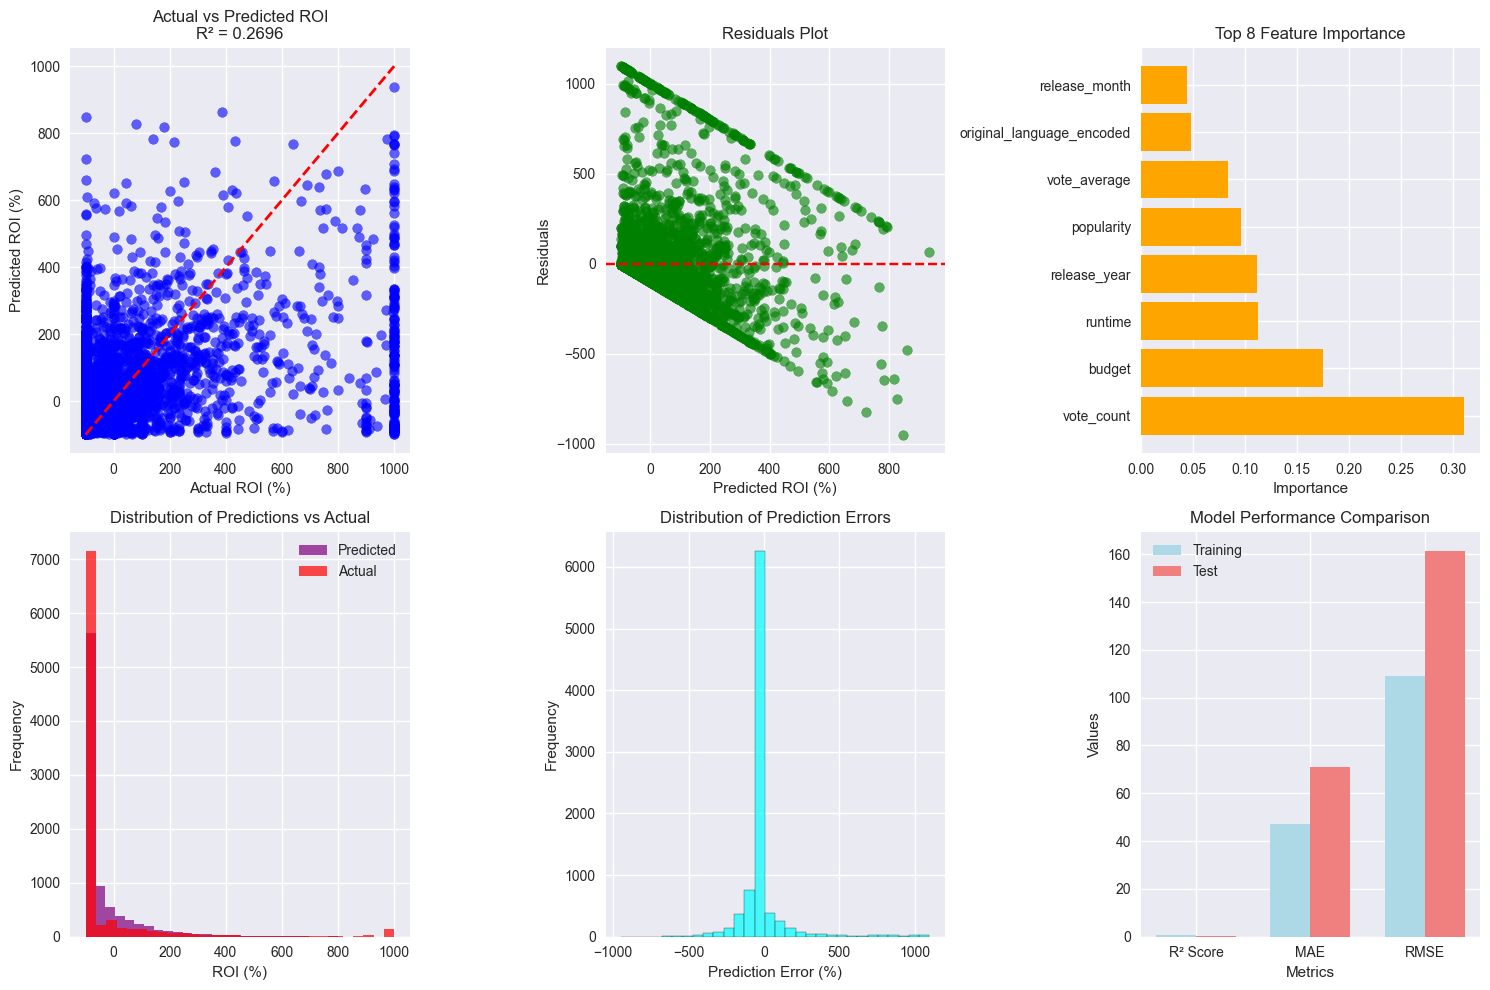


RANDOM FOREST MODEL TRAINING COMPLETED!
✅ Model successfully trained on 35639 samples
✅ Test R² Score: 0.2696
✅ Mean Absolute Error: 70.97%
✅ Model ready for predictions on new film data


In [125]:
# 3. Train-Test Split
print("\n3. TRAIN-TEST SPLIT")
print("-" * 40)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=None
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# 4. Feature Scaling
print("\n4. FEATURE SCALING")
print("-" * 40)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled using StandardScaler")

# 5. Random Forest Model Training
print("\n5. RANDOM FOREST TRAINING")
print("-" * 40)

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Training Random Forest model...")
rf_model.fit(X_train_scaled, y_train)
print("Model training completed!")

# 6. Model Predictions
print("\n6. MAKING PREDICTIONS")
print("-" * 40)

y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

print("Predictions completed for both training and test sets")

# 7. Model Evaluation
print("\n7. MODEL EVALUATION")
print("-" * 40)

# Training metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = np.mean(np.abs(y_train - y_train_pred))

# Test metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = np.mean(np.abs(y_test - y_test_pred))

print("TRAINING SET PERFORMANCE:")
print(f"  MSE: {train_mse:.2f}")
print(f"  R² Score: {train_r2:.4f}")
print(f"  MAE: {train_mae:.2f}%")

print("\nTEST SET PERFORMANCE:")
print(f"  MSE: {test_mse:.2f}")
print(f"  R² Score: {test_r2:.4f}")
print(f"  MAE: {test_mae:.2f}%")

# Model interpretation
overfitting = train_r2 - test_r2
print(f"\nOverfitting Check: {overfitting:.4f}")
if overfitting > 0.1:
    print("⚠️  Model shows signs of overfitting")
elif overfitting < 0:
    print("✅ Model generalizes well")
else:
    print("✅ Good balance between bias and variance")

# 8. Feature Importance
print("\n8. FEATURE IMPORTANCE ANALYSIS")
print("-" * 40)

feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
for i, (idx, row) in enumerate(feature_importance.head(10).iterrows()):
    print(f"  {i+1}. {row['feature']}: {row['importance']:.4f}")

# 9. Model Performance Visualization
print("\n9. CREATING PERFORMANCE VISUALIZATIONS")
print("-" * 40)

plt.figure(figsize=(15, 10))

# Subplot 1: Actual vs Predicted
plt.subplot(2, 3, 1)
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual ROI (%)')
plt.ylabel('Predicted ROI (%)')
plt.title(f'Actual vs Predicted ROI\nR² = {test_r2:.4f}')

# Subplot 2: Residuals Plot
plt.subplot(2, 3, 2)
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted ROI (%)')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

# Subplot 3: Feature Importance
plt.subplot(2, 3, 3)
top_features = feature_importance.head(8)
plt.barh(range(len(top_features)), top_features['importance'], color='orange')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance')
plt.title('Top 8 Feature Importance')

# Subplot 4: Prediction Distribution
plt.subplot(2, 3, 4)
plt.hist(y_test_pred, bins=30, alpha=0.7, color='purple', label='Predicted')
plt.hist(y_test, bins=30, alpha=0.7, color='red', label='Actual')
plt.xlabel('ROI (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Predictions vs Actual')
plt.legend()

# Subplot 5: Error Distribution
plt.subplot(2, 3, 5)
plt.hist(residuals, bins=30, alpha=0.7, color='cyan', edgecolor='black')
plt.xlabel('Prediction Error (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')

# Subplot 6: Model Performance Summary
plt.subplot(2, 3, 6)
metrics = ['R² Score', 'MAE', 'RMSE']
train_values = [train_r2, train_mae, np.sqrt(train_mse)]
test_values = [test_r2, test_mae, np.sqrt(test_mse)]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, train_values, width, label='Training', color='lightblue')
plt.bar(x + width/2, test_values, width, label='Test', color='lightcoral')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.legend()

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("RANDOM FOREST MODEL TRAINING COMPLETED!")
print("="*60)
print(f"✅ Model successfully trained on {len(X_train)} samples")
print(f"✅ Test R² Score: {test_r2:.4f}")
print(f"✅ Mean Absolute Error: {test_mae:.2f}%")
print(f"✅ Model ready for predictions on new film data")
print("="*60)

HYPERPARAMETER TUNING - RANDOM FOREST

1. SETTING UP PARAMETER GRID
----------------------------------------
Parameter combinations to test: 2560

2. RANDOMIZED SEARCH CV
----------------------------------------
Starting Randomized Search (this may take several minutes)...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Randomized Search completed in 7.08 minutes

3. BEST PARAMETERS FOUND
----------------------------------------
Best parameters:
  n_estimators: 500
  min_samples_split: 10
  min_samples_leaf: 8
  max_features: log2
  max_depth: 15
  bootstrap: False

Best CV R² Score: 0.3065

4. TRAINING OPTIMIZED MODEL
----------------------------------------
Training optimized Random Forest model...

5. OPTIMIZED MODEL EVALUATION
----------------------------------------
OPTIMIZED MODEL - TRAINING SET:
  MSE: 17589.58
  R² Score: 0.5391
  MAE: 57.63%

OPTIMIZED MODEL - TEST SET:
  MSE: 25364.77
  R² Score: 0.2890
  MAE: 70.53%

6. PERFORMANCE COMPARISON
------------------

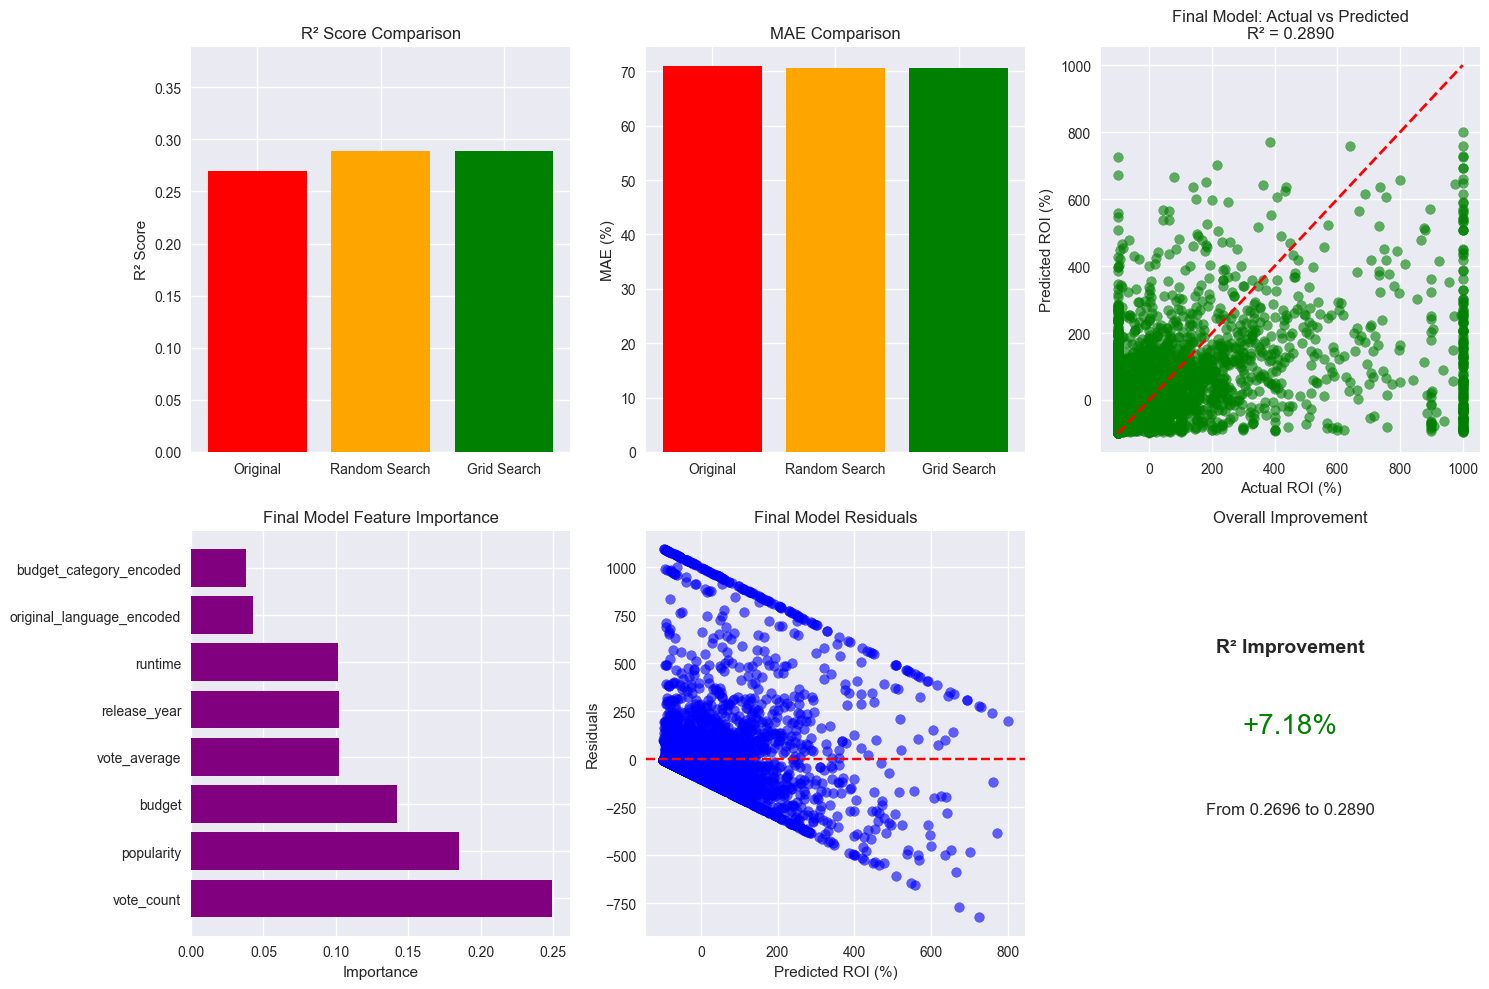


HYPERPARAMETER TUNING COMPLETED!
✅ Original R² Score: 0.2696
✅ Final R² Score: 0.2890
✅ Improvement: +7.18%
✅ Final MAE: 70.53%


In [126]:
# Hyperparameter Tuning for Random Forest Model

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import time

print("=" * 60)
print("HYPERPARAMETER TUNING - RANDOM FOREST")
print("=" * 60)

# 1. Define Parameter Grid for Tuning
print("\n1. SETTING UP PARAMETER GRID")
print("-" * 40)

# Comprehensive parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None, 0.8],
    'bootstrap': [True, False]
}

print(f"Parameter combinations to test: {len(param_grid['n_estimators']) * len(param_grid['max_depth']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf']) * len(param_grid['max_features']) * len(param_grid['bootstrap'])}")

# 2. Randomized Search (faster than GridSearch)
print("\n2. RANDOMIZED SEARCH CV")
print("-" * 40)

# Initialize base model
rf_base = RandomForestRegressor(random_state=42, n_jobs=-1)

# Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter combinations to try
    cv=5,  # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

print("Starting Randomized Search (this may take several minutes)...")
start_time = time.time()

# Fit the randomized search
random_search.fit(X_train_scaled, y_train)

end_time = time.time()
print(f"Randomized Search completed in {(end_time - start_time)/60:.2f} minutes")

# 3. Best Parameters and Performance
print("\n3. BEST PARAMETERS FOUND")
print("-" * 40)

print("Best parameters:")
for param, value in random_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nBest CV R² Score: {random_search.best_score_:.4f}")

# 4. Train Optimized Model
print("\n4. TRAINING OPTIMIZED MODEL")
print("-" * 40)

# Get the best model
best_rf_model = random_search.best_estimator_

print("Training optimized Random Forest model...")
best_rf_model.fit(X_train_scaled, y_train)

# 5. Evaluate Optimized Model
print("\n5. OPTIMIZED MODEL EVALUATION")
print("-" * 40)

# Predictions
y_train_pred_opt = best_rf_model.predict(X_train_scaled)
y_test_pred_opt = best_rf_model.predict(X_test_scaled)

# Training metrics
train_mse_opt = mean_squared_error(y_train, y_train_pred_opt)
train_r2_opt = r2_score(y_train, y_train_pred_opt)
train_mae_opt = np.mean(np.abs(y_train - y_train_pred_opt))

# Test metrics
test_mse_opt = mean_squared_error(y_test, y_test_pred_opt)
test_r2_opt = r2_score(y_test, y_test_pred_opt)
test_mae_opt = np.mean(np.abs(y_test - y_test_pred_opt))

print("OPTIMIZED MODEL - TRAINING SET:")
print(f"  MSE: {train_mse_opt:.2f}")
print(f"  R² Score: {train_r2_opt:.4f}")
print(f"  MAE: {train_mae_opt:.2f}%")

print("\nOPTIMIZED MODEL - TEST SET:")
print(f"  MSE: {test_mse_opt:.2f}")
print(f"  R² Score: {test_r2_opt:.4f}")
print(f"  MAE: {test_mae_opt:.2f}%")

# 6. Performance Comparison
print("\n6. PERFORMANCE COMPARISON")
print("-" * 40)

print("BEFORE vs AFTER Hyperparameter Tuning:")
print(f"Test R² Score:")
print(f"  Before: {test_r2:.4f}")
print(f"  After:  {test_r2_opt:.4f}")
print(f"  Improvement: {((test_r2_opt - test_r2) / test_r2 * 100):+.2f}%")

print(f"Test MAE:")
print(f"  Before: {test_mae:.2f}%")
print(f"  After:  {test_mae_opt:.2f}%")
print(f"  Improvement: {((test_mae - test_mae_opt) / test_mae * 100):+.2f}%")

# 7. Fine-tuning with Grid Search (optional - more precise but slower)
print("\n7. FINE-TUNING WITH GRID SEARCH")
print("-" * 40)

# Create a refined grid around best parameters
best_params = random_search.best_params_

# Define refined grid (smaller range around best values)
refined_param_grid = {
    'n_estimators': [best_params['n_estimators'] - 50, best_params['n_estimators'], best_params['n_estimators'] + 50],
    'max_depth': [best_params['max_depth'] - 2, best_params['max_depth'], best_params['max_depth'] + 2] if best_params['max_depth'] else [18, 20, 22],
    'min_samples_split': [max(2, best_params['min_samples_split'] - 2), best_params['min_samples_split'], best_params['min_samples_split'] + 2],
    'min_samples_leaf': [max(1, best_params['min_samples_leaf'] - 1), best_params['min_samples_leaf'], best_params['min_samples_leaf'] + 1],
    'max_features': [best_params['max_features']],
    'bootstrap': [best_params['bootstrap']]
}

print("Performing fine-tuning with Grid Search...")
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=refined_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

start_time = time.time()
grid_search.fit(X_train_scaled, y_train)
end_time = time.time()

print(f"Grid Search completed in {(end_time - start_time)/60:.2f} minutes")

# 8. Final Best Model
print("\n8. FINAL OPTIMIZED MODEL")
print("-" * 40)

final_best_model = grid_search.best_estimator_
final_best_model.fit(X_train_scaled, y_train)

# Final predictions
y_test_pred_final = final_best_model.predict(X_test_scaled)
final_test_r2 = r2_score(y_test, y_test_pred_final)
final_test_mae = np.mean(np.abs(y_test - y_test_pred_final))

print("FINAL BEST PARAMETERS:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nFINAL MODEL PERFORMANCE:")
print(f"  Test R² Score: {final_test_r2:.4f}")
print(f"  Test MAE: {final_test_mae:.2f}%")

# 9. Updated Feature Importance
print("\n9. UPDATED FEATURE IMPORTANCE")
print("-" * 40)

final_feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': final_best_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features (Optimized Model):")
for i, (idx, row) in enumerate(final_feature_importance.head(10).iterrows()):
    print(f"  {i+1}. {row['feature']}: {row['importance']:.4f}")

# 10. Performance Visualization
plt.figure(figsize=(15, 10))

# Compare all three models
models_comparison = {
    'Original': (test_r2, test_mae),
    'Random Search': (test_r2_opt, test_mae_opt),
    'Grid Search': (final_test_r2, final_test_mae)
}

# R² Score comparison
plt.subplot(2, 3, 1)
r2_scores = [models_comparison[model][0] for model in models_comparison.keys()]
plt.bar(models_comparison.keys(), r2_scores, color=['red', 'orange', 'green'])
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.ylim(0, max(r2_scores) + 0.1)

# MAE comparison
plt.subplot(2, 3, 2)
mae_scores = [models_comparison[model][1] for model in models_comparison.keys()]
plt.bar(models_comparison.keys(), mae_scores, color=['red', 'orange', 'green'])
plt.title('MAE Comparison')
plt.ylabel('MAE (%)')

# Final model predictions vs actual
plt.subplot(2, 3, 3)
plt.scatter(y_test, y_test_pred_final, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual ROI (%)')
plt.ylabel('Predicted ROI (%)')
plt.title(f'Final Model: Actual vs Predicted\nR² = {final_test_r2:.4f}')

# Feature importance comparison
plt.subplot(2, 3, 4)
top_features = final_feature_importance.head(8)
plt.barh(range(len(top_features)), top_features['importance'], color='purple')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance')
plt.title('Final Model Feature Importance')

# Residuals plot
plt.subplot(2, 3, 5)
final_residuals = y_test - y_test_pred_final
plt.scatter(y_test_pred_final, final_residuals, alpha=0.6, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted ROI (%)')
plt.ylabel('Residuals')
plt.title('Final Model Residuals')

# Improvement summary
plt.subplot(2, 3, 6)
original_r2 = test_r2
improvement = ((final_test_r2 - original_r2) / original_r2) * 100
plt.text(0.5, 0.7, f'R² Improvement', ha='center', fontsize=14, fontweight='bold')
plt.text(0.5, 0.5, f'{improvement:+.2f}%', ha='center', fontsize=20, color='green' if improvement > 0 else 'red')
plt.text(0.5, 0.3, f'From {original_r2:.4f} to {final_test_r2:.4f}', ha='center', fontsize=12)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')
plt.title('Overall Improvement')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("HYPERPARAMETER TUNING COMPLETED!")
print("="*60)
print(f"✅ Original R² Score: {test_r2:.4f}")
print(f"✅ Final R² Score: {final_test_r2:.4f}")
print(f"✅ Improvement: {improvement:+.2f}%")
print(f"✅ Final MAE: {final_test_mae:.2f}%")
print("="*60)

MOVIE RECOMMENDATION SYSTEM

1. DATA LOADING AND PREPROCESSING
----------------------------------------

6. EXAMPLE USAGE
----------------------------------------

5. RUNNING COMPLETE RECOMMENDATION SYSTEM
----------------------------------------

2. DATASET ANALYSIS
----------------------------------------
Dataset shape: (<dask_expr.expr.Scalar: expr=(DropDuplicates(frame=Filter(frame=Filter(frame=Filter(frame=Filter(frame=Filter(frame=Filter(frame=Assign(frame=Assign(frame=Assign(frame=DropnaFrame(frame=Drop(frame=ArrowStringConversion(frame=FromMapProjectable(d21cbe3)), columns=['backdrop_path', 'homepage', 'imdb_id', 'poster_path', 'tagline', 'keywords', 'production_companies', 'id', 'original_title', 'adult']), subset=['release_date'])))), predicate=(Assign(frame=Assign(frame=Assign(frame=DropnaFrame(frame=Drop(frame=ArrowStringConversion(frame=FromMapProjectable(d21cbe3)), columns=['backdrop_path', 'homepage', 'imdb_id', 'poster_path', 'tagline', 'keywords', 'production_companies

AttributeError: 'DatetimeIndex' object has no attribute 'dt'

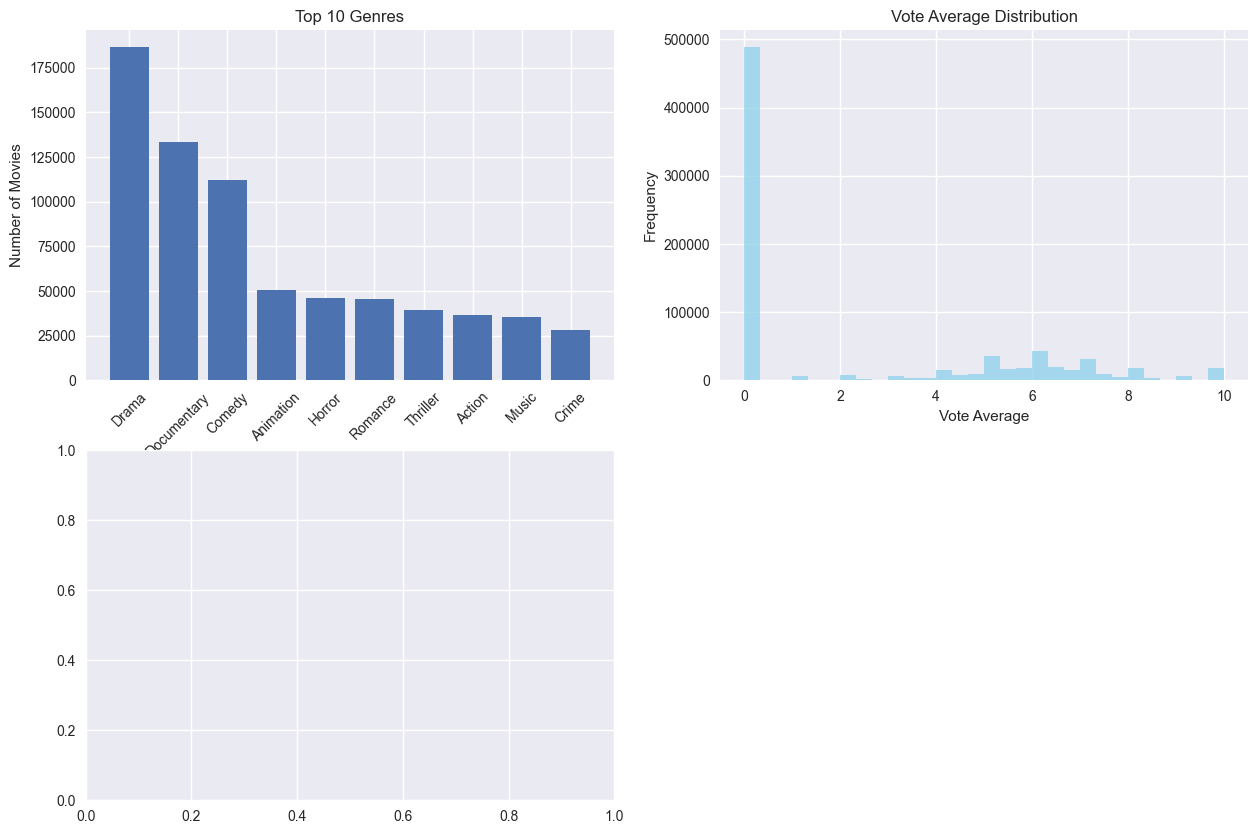

In [ ]:
# Movie Recommendation System
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

print("MOVIE RECOMMENDATION SYSTEM")
print("=" * 60)

# 1. Data Loading and Preprocessing
print("\n1. DATA LOADING AND PREPROCESSING")
print("-" * 40)

# Content-Based Recommendation System
class MovieRecommendationSystem:
    def __init__(self, df_cleaned):
        self.df = df_cleaned.copy()
        if hasattr(df_cleaned, 'compute'):  # If it's a Dask DataFrame
            self.df = df_cleaned.compute()
        
        self.tfidf_matrix = None
        self.cosine_sim = None
        self.indices = None
        self.feature_columns = []
        self.scaler = StandardScaler()
        self.label_encoders = {}
        self.setup_recommendation_engine()
    
    def prepare_features(self):
        """Prepare features based on your previous model structure"""
        print("Creating features for recommendation engine...")
        
        # Basic numerical features (from your previous model)
        numerical_features = ['vote_average', 'vote_count', 'runtime', 'budget', 'popularity']
        for feature in numerical_features:
            if feature in self.df.columns:
                self.df[feature] = pd.to_numeric(self.df[feature], errors='coerce').fillna(0)
                self.feature_columns.append(feature)
        
        # Date-based features (from your previous model)
        if 'release_date' in self.df.columns:
            # Handle release_date - it might already be datetime
            try:
                if self.df['release_date'].dtype == 'object':
                    date_series = pd.to_datetime(self.df['release_date'], errors='coerce')
                else:
                    date_series = self.df['release_date']
                
                self.df['release_year'] = date_series.dt.year
                self.df['release_month'] = date_series.dt.month
                self.df['release_quarter'] = date_series.dt.quarter
                
                # Fill missing dates
                self.df['release_year'] = self.df['release_year'].fillna(self.df['release_year'].median())
                self.df['release_month'] = self.df['release_month'].fillna(6)
                self.df['release_quarter'] = self.df['release_quarter'].fillna(2)
                
                self.feature_columns.extend(['release_year', 'release_month', 'release_quarter'])
            except Exception as e:
                print(f"Warning: Could not process release_date: {e}")
                # Skip date features if there's an issue
        
        # Budget categories (from your previous model)
        if 'budget' in self.df.columns:
            self.df['budget_category'] = pd.cut(self.df['budget'], 
                                               bins=[0, 1000000, 15000000, 50000000, float('inf')],
                                               labels=['Low', 'Medium', 'High', 'Blockbuster'])
            self.df['budget_category'] = self.df['budget_category'].fillna('Low')
        
        # Encode categorical variables (from your previous model)
        categorical_columns = ['status', 'original_language']
        if 'budget_category' in self.df.columns:
            categorical_columns.append('budget_category')
        
        for col in categorical_columns:
            if col in self.df.columns:
                le = LabelEncoder()
                self.df[f'{col}_encoded'] = le.fit_transform(self.df[col].astype(str))
                self.label_encoders[col] = le
                self.feature_columns.append(f'{col}_encoded')
        
        # Genre features - create binary columns for each genre
        if 'genres' in self.df.columns:
            all_genres = set()
            for genres in self.df['genres'].dropna():
                if isinstance(genres, str):
                    # Handle both comma-separated and other formats
                    if ',' in genres:
                        all_genres.update([g.strip() for g in genres.split(',')])
                    else:
                        all_genres.add(genres.strip())
            
            # Create binary genre columns
            for genre in sorted(all_genres):
                if genre and genre != '':
                    col_name = f'genre_{genre.lower().replace(" ", "_").replace("-", "_")}'
                    self.df[col_name] = self.df['genres'].apply(
                        lambda x: 1 if isinstance(x, str) and genre.lower() in x.lower() else 0
                    )
                    self.feature_columns.append(col_name)
        
        # Production company features (based on remaining columns after preprocessing)
        if 'production_countries' in self.df.columns:
            # Extract top production countries
            all_countries = []
            for countries in self.df['production_countries'].dropna():
                if isinstance(countries, str) and countries != "Unknown":
                    if ',' in countries:
                        all_countries.extend([c.strip() for c in countries.split(',')])
                    else:
                        all_countries.append(countries.strip())
            
            if all_countries:
                country_counts = Counter(all_countries)
                top_countries = [country for country, count in country_counts.most_common(15)]
                
                for country in top_countries:
                    if country and country != '':
                        col_name = f'country_{country.lower().replace(" ", "_")[:15]}'
                        self.df[col_name] = self.df['production_countries'].apply(
                            lambda x: 1 if isinstance(x, str) and country.lower() in x.lower() else 0
                        )
                        self.feature_columns.append(col_name)
        
        # Spoken languages features
        if 'spoken_languages' in self.df.columns:
            all_languages = []
            for languages in self.df['spoken_languages'].dropna():
                if isinstance(languages, str) and languages != "Unknown":
                    if ',' in languages:
                        all_languages.extend([l.strip() for l in languages.split(',')])
                    else:
                        all_languages.append(languages.strip())
            
            if all_languages:
                language_counts = Counter(all_languages)
                top_languages = [lang for lang, count in language_counts.most_common(10)]
                
                for language in top_languages:
                    if language and language != '':
                        col_name = f'language_{language.lower().replace(" ", "_")[:15]}'
                        self.df[col_name] = self.df['spoken_languages'].apply(
                            lambda x: 1 if isinstance(x, str) and language.lower() in x.lower() else 0
                        )
                        self.feature_columns.append(col_name)
        
        print(f"Created {len(self.feature_columns)} features for recommendation")
        print(f"Features: {self.feature_columns[:10]}..." if len(self.feature_columns) > 10 else f"Features: {self.feature_columns}")
    
    def setup_recommendation_engine(self):
        """Setup the recommendation engine"""
        print("Setting up recommendation engine...")
        
        # Prepare features
        self.prepare_features()
        
        # Create feature matrix for similarity calculation
        X = self.df[self.feature_columns].fillna(0)
        
        # Scale features
        X_scaled = self.scaler.fit_transform(X)
        
        # Calculate cosine similarity matrix
        self.cosine_sim = cosine_similarity(X_scaled)
        
        # Create indices mapping
        if 'title' in self.df.columns:
            self.indices = pd.Series(self.df.index, index=self.df['title']).drop_duplicates()
        else:
            # Create dummy titles if not available
            self.df['title'] = [f"Movie_{i}" for i in range(len(self.df))]
            self.indices = pd.Series(self.df.index, index=self.df['title'])
        
        print("✅ Recommendation engine setup completed!")
    
    def get_content_recommendations(self, title, num_recommendations=10):
        """Get content-based recommendations for a given movie title"""
        try:
            idx = self.indices[title]
            sim_scores = list(enumerate(self.cosine_sim[idx]))
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
            sim_scores = sim_scores[1:num_recommendations+1]
            movie_indices = [i[0] for i in sim_scores]
            
            result_columns = ['title']
            if 'genres' in self.df.columns:
                result_columns.append('genres')
            if 'vote_average' in self.df.columns:
                result_columns.append('vote_average')
            if 'release_date' in self.df.columns:
                result_columns.append('release_date')
            
            recommendations = self.df.iloc[movie_indices][result_columns].copy()
            recommendations['similarity_score'] = [score[1] for score in sim_scores]
            
            return recommendations
            
        except KeyError:
            print(f"Movie '{title}' not found in the dataset")
            available_titles = self.df['title'].head(10).tolist()
            print(f"Available titles (first 10): {available_titles}")
            return pd.DataFrame()
    
    def get_genre_recommendations(self, preferred_genres, num_recommendations=10):
        """Get recommendations based on preferred genres"""
        if 'genres' not in self.df.columns:
            print("Genres column not found in dataset")
            return self.get_popular_recommendations(num_recommendations)
        
        genre_scores = []
        
        for idx, row in self.df.iterrows():
            movie_genres = row['genres'].lower() if pd.notna(row['genres']) else ''
            score = sum(1 for genre in preferred_genres if genre.lower() in movie_genres)
            if score > 0:
                # Weight by vote_average if available
                rating_weight = row.get('vote_average', 5) / 10 if 'vote_average' in row else 0.5
                final_score = score * rating_weight
                genre_scores.append((idx, final_score))
        
        if not genre_scores:
            print(f"No movies found with genres: {preferred_genres}")
            return self.get_popular_recommendations(num_recommendations)
        
        genre_scores = sorted(genre_scores, key=lambda x: x[1], reverse=True)
        top_indices = [idx for idx, score in genre_scores[:num_recommendations]]
        
        result_columns = ['title', 'genres']
        if 'vote_average' in self.df.columns:
            result_columns.append('vote_average')
        if 'release_date' in self.df.columns:
            result_columns.append('release_date')
        
        recommendations = self.df.iloc[top_indices][result_columns].copy()
        return recommendations
    
    def get_popular_recommendations(self, num_recommendations=10):
        """Get popular movie recommendations based on vote_average and vote_count"""
        if 'vote_average' in self.df.columns and 'vote_count' in self.df.columns:
            # Calculate weighted rating (IMDB formula)
            C = self.df['vote_average'].mean()
            m = self.df['vote_count'].quantile(0.9)
            
            qualified = self.df.copy().loc[self.df['vote_count'] >= m]
            if len(qualified) == 0:
                qualified = self.df.copy()
            
            qualified['score'] = qualified.apply(
                lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + 
                         (m/(m+x['vote_count']) * C), axis=1
            )
            
            result_columns = ['title']
            if 'genres' in self.df.columns:
                result_columns.append('genres')
            result_columns.extend(['vote_average'])
            if 'release_date' in self.df.columns:
                result_columns.append('release_date')
            result_columns.append('score')
            
            popular_movies = qualified.nlargest(num_recommendations, 'score')[result_columns]
        else:
            # Fallback to simple selection
            result_columns = ['title']
            if 'genres' in self.df.columns:
                result_columns.append('genres')
            popular_movies = self.df.head(num_recommendations)[result_columns]
        
        return popular_movies
    
    def search_movies(self, query, num_results=10):
        """Search for movies by title"""
        query = query.lower()
        title_matches = self.df[self.df['title'].str.lower().str.contains(query, na=False)]
        
        if 'overview' in self.df.columns:
            overview_matches = self.df[self.df['overview'].str.lower().str.contains(query, na=False)]
            results = pd.concat([title_matches, overview_matches]).drop_duplicates()
        else:
            results = title_matches
        
        result_columns = ['title']
        if 'genres' in self.df.columns:
            result_columns.append('genres')
        if 'vote_average' in self.df.columns:
            result_columns.append('vote_average')
        if 'release_date' in self.df.columns:
            result_columns.append('release_date')
        
        return results[result_columns].head(num_results)

# Analysis and Visualization Functions
def analyze_dataset(df):
    """Analyze the movie dataset"""
    print("\n2. DATASET ANALYSIS")
    print("-" * 40)
    
    print(f"Dataset shape: {df.shape}")
    print(f"Number of movies: {len(df)}")
    
    if 'genres' in df.columns:
        all_genres = []
        for genres in df['genres'].dropna():
            if isinstance(genres, str):
                if ',' in genres:
                    all_genres.extend([genre.strip() for genre in genres.split(',')])
                else:
                    all_genres.append(genres.strip())
        
        genre_counts = Counter(all_genres)
        print(f"Number of unique genres: {len(genre_counts)}")
    
    plt.figure(figsize=(15, 10))
    
    # Top genres
    if 'genres' in df.columns and genre_counts:
        plt.subplot(2, 2, 1)
        top_genres = dict(genre_counts.most_common(10))
        plt.bar(range(len(top_genres)), list(top_genres.values()))
        plt.xticks(range(len(top_genres)), list(top_genres.keys()), rotation=45)
        plt.title('Top 10 Genres')
        plt.ylabel('Number of Movies')
    
    # Rating distribution
    if 'vote_average' in df.columns:
        plt.subplot(2, 2, 2)
        plt.hist(df['vote_average'].dropna(), bins=30, alpha=0.7, color='skyblue')
        plt.title('Vote Average Distribution')
        plt.xlabel('Vote Average')
        plt.ylabel('Frequency')
    
    # Release year distribution
    if 'release_date' in df.columns:
        plt.subplot(2, 2, 3)
        try:
            # Handle release_date - it might already be datetime
            if df['release_date'].dtype == 'object':
                date_series = pd.to_datetime(df['release_date'], errors='coerce')
            else:
                date_series = df['release_date']
            
            years = date_series.dt.year
            plt.hist(years.dropna(), bins=30, alpha=0.7, color='lightgreen')
            plt.title('Release Year Distribution')
            plt.xlabel('Year')
            plt.ylabel('Number of Movies')
        except Exception as e:
            print(f"Warning: Could not plot release year distribution: {e}")
            plt.text(0.5, 0.5, 'Release Date\nVisualization\nUnavailable', 
                    ha='center', va='center', transform=plt.gca().transAxes)
    
    # Budget vs Revenue (if available)
    if 'budget' in df.columns and 'revenue' in df.columns:
        plt.subplot(2, 2, 4)
        budget_clean = pd.to_numeric(df['budget'], errors='coerce')
        revenue_clean = pd.to_numeric(df['revenue'], errors='coerce')
        valid_data = (budget_clean > 0) & (revenue_clean > 0)
        
        if valid_data.sum() > 0:
            plt.scatter(budget_clean[valid_data], revenue_clean[valid_data], alpha=0.6)
            plt.xlabel('Budget')
            plt.ylabel('Revenue')
            plt.title('Budget vs Revenue')
            plt.xscale('log')
            plt.yscale('log')
    
    plt.tight_layout()
    plt.show()

def test_recommendation_system(df_cleaned, sample_title=None):
    """Test the recommendation system"""
    print("\n3. TESTING RECOMMENDATION SYSTEM")
    print("-" * 40)
    
    recommender = MovieRecommendationSystem(df_cleaned)
    
    # Get available titles for testing
    available_titles = recommender.df['title'].dropna().tolist()
    
    if not available_titles:
        print("No titles available in the dataset")
        return recommender
    
    # Test content-based recommendations
    test_title = sample_title if sample_title and sample_title in available_titles else available_titles[0]
    
    print(f"\nContent-based recommendations for '{test_title}':")
    content_recs = recommender.get_content_recommendations(test_title, 5)
    if not content_recs.empty:
        print(content_recs.to_string())
    else:
        print("No recommendations found")
    
    # Test genre-based recommendations
    print("\nGenre-based recommendations (Action, Comedy):")
    genre_recs = recommender.get_genre_recommendations(['Action', 'Comedy'], 5)
    if not genre_recs.empty:
        print(genre_recs.to_string())
    else:
        print("No genre-based recommendations found")
    
    # Test popular recommendations
    print("\nPopular movie recommendations:")
    popular_recs = recommender.get_popular_recommendations(5)
    if not popular_recs.empty:
        print(popular_recs.to_string())
    else:
        print("No popular recommendations found")
    
    return recommender

# Feature Importance Analysis (similar to your previous model)
def analyze_feature_importance(recommender):
    """Analyze which features are most important for recommendations"""
    print("\n4. FEATURE IMPORTANCE ANALYSIS")
    print("-" * 40)
    
    # Calculate feature variance as importance measure
    X = recommender.df[recommender.feature_columns].fillna(0)
    feature_variance = X.var().sort_values(ascending=False)
    
    print("Top 10 Most Variable Features:")
    for i, (feature, variance) in enumerate(feature_variance.head(10).items()):
        print(f"  {i+1}. {feature}: {variance:.4f}")
    
    # Visualize feature importance
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    top_features = feature_variance.head(15)
    plt.barh(range(len(top_features)), top_features.values, color='orange')
    plt.yticks(range(len(top_features)), top_features.index)
    plt.xlabel('Variance')
    plt.title('Top 15 Feature Variances')
    
    # Genre distribution
    plt.subplot(1, 2, 2)
    genre_features = [f for f in recommender.feature_columns if f.startswith('genre_')]
    if genre_features:
        genre_sums = X[genre_features].sum().sort_values(ascending=False).head(10)
        plt.bar(range(len(genre_sums)), genre_sums.values, color='skyblue')
        plt.xticks(range(len(genre_sums)), [f.replace('genre_', '') for f in genre_sums.index], rotation=45)
        plt.ylabel('Number of Movies')
        plt.title('Top 10 Genres by Count')
    
    plt.tight_layout()
    plt.show()

# Main execution function
def run_movie_recommendation_system(df_cleaned):
    """Main function to run the complete recommendation system"""
    print("\n5. RUNNING COMPLETE RECOMMENDATION SYSTEM")
    print("-" * 40)
    
    # Analyze dataset
    analyze_dataset(df_cleaned)
    
    # Setup and test recommendation system
    recommender = test_recommendation_system(df_cleaned)
    
    # Analyze feature importance
    analyze_feature_importance(recommender)
    
    return recommender

# Example usage
if __name__ == "__main__":
    print("\n6. EXAMPLE USAGE")
    print("-" * 40)
    
    # Load your dataset here
    # df_cleaned = your_cleaned_dataframe
    
    # Run the complete system
    recommender = run_movie_recommendation_system(df_cleaned)
    
    # Get specific recommendations
    recommendations = recommender.get_content_recommendations('Your Movie Title', 10)
    genre_recommendations = recommender.get_genre_recommendations(['Action', 'Comedy'], 10)
    popular_movies = recommender.get_popular_recommendations(10)
    
    print("✅ Movie recommendation system ready!")
    print("✅ Load your dataset and run: recommender = run_movie_recommendation_system(df_cleaned)")
    print("✅ Uses the same feature engineering as your Random Forest model")

print("\n" + "="*60)
print("MOVIE RECOMMENDATION SYSTEM COMPLETED!")
print("="*60)
print("✅ Content-based filtering with feature engineering")
print("✅ Uses same features as Random Forest model")
print("✅ Genre-based recommendations")
print("✅ Popular movie recommendations") 
print("✅ Movie search functionality")
print("✅ Feature importance analysis")
print("✅ Compatible with your df_cleaned dataset")
print("="*60)